## First EDA from crime data in Mexico City

This notebook will be an initial approach to get some insights from the more than 1M rows obtained from public data from Mexico City reported crimes

In [61]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#Path
#Insert your local repo path to file da_victimas_completa_marzo_2023.zip
csv_path = "D:\Archivos\Social Data Challenge\sdc-security\datasets\da_victimas_completa_marzo_2023.zip"

In [11]:
zf = zipfile.ZipFile(csv_path) 
df_raw= pd.read_csv(zf.open('da_victimas_completa_marzo_2023.csv'))


In [12]:
df_raw.head()

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,...,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,alcaldia_hechos,municipio_hechos,colonia_datos,fgj_colonia_registro,latitud,longitud
0,8324429.0,2019,Enero,2019-01-04,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62.0,FISICA,OFENDIDO,...,Agosto,2018-08-29,12:00:00,12:19:00,ALVARO OBREGON,NaN,GUADALUPE INN,GUADALUPE INN,19.36125,-99.18314
1,8324430.0,2019,Enero,2019-01-04,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38.0,FISICA,VICTIMA Y DENUNCIANTE,...,Diciembre,2018-12-15,15:00:00,12:20:00,AZCAPOTZALCO,NaN,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,19.47181,-99.16458
2,8324431.0,2019,Enero,2019-01-04,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,...,Diciembre,2018-12-22,15:30:00,12:23:00,COYOACAN,NaN,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,19.33797,-99.18611
3,8324435.0,2019,Enero,2019-01-04,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,...,Enero,2019-01-04,06:00:00,12:27:00,IZTACALCO,NaN,PANTITLAN V,AGRÍCOLA PANTITLAN,19.40327,-99.05983
4,8324438.0,2019,Enero,2019-01-04,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,...,Enero,2019-01-03,20:00:00,12:35:00,IZTAPALAPA,NaN,LAS AMERICAS (U HAB),PROGRESISTA,19.35480,-99.06324


### Values exploration

First step is taking a look of what columns are present on the dataset and how many different values are contained on those columns. 

In [13]:
df_raw.columns

Index(['idCarpeta', 'Año_inicio', 'Mes_inicio', 'FechaInicio', 'Delito',
       'Categoria', 'Sexo', 'Edad', 'TipoPersona', 'CalidadJuridica',
       'competencia', 'Año_hecho', 'Mes_hecho', 'FechaHecho', 'HoraHecho',
       'HoraInicio', 'alcaldia_hechos', 'municipio_hechos', 'colonia_datos',
       'fgj_colonia_registro', 'latitud', 'longitud'],
      dtype='object')

In [34]:
print("Shape of dataset: {}\n".format(df_raw.shape))

#Checking different values
print("Different 'Año_inicio' column values: {}\n".format(df_raw.Año_inicio.unique()))
print("Different 'Mes_inicio' column values: {}\n'".format(df_raw.Mes_inicio.unique()))

print("Count of different 'Delito' column values: {}\n".format(df_raw.Delito.unique().size))

delitos = df_raw.Delito.unique()
#print("Different 'Delito' column values: {}".format(df_raw.Delito.unique()))

Shape of dataset: (1038430, 22)

Different 'Año_inicio' column values: [2019 2020 2021 2022 2023]

Different 'Mes_inicio' column values: ['Enero' 'Junio' 'Abril' 'Mayo' 'Febrero' 'Marzo' 'Septiembre' 'Julio'
 'Octubre' 'Agosto' 'Diciembre' 'Noviembre']
'
Count of different 'Delito' column values: 310
'


In [32]:
print("Different 'Delito' column values: {}\n'".format(df_raw.Delito.unique()))


Different 'Delito' column values: ['FRAUDE'
 'PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE'
 'ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA'
 'ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA'
 'ROBO DE MOTOCICLETA SIN VIOLENCIA'
 'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA' 'VIOLACION'
 'OMISION DE AUXILIO O DE CUIDADO' 'DESPOJO'
 'ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA'
 'ROBO DE ACCESORIOS DE AUTO'
 'ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PRIVADO SIN VIOLENCIA'
 'ROBO DE OBJETOS' 'ABUSO DE CONFIANZA'
 'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA'
 'VIOLENCIA FAMILIAR' 'ROBO A CASA HABITACION SIN VIOLENCIA'
 'ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA'
 'ROBO A REPARTIDOR SIN VIOLENCIA'
 'DELITOS DE ABOGADOS, PATRONOS, LITIGANTES Y ASESORES JURIDICOS'
 'ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA' 'AMENAZAS'
 'LESIONES INTENCI

## 'Delito' Category: Robo

The 'Delito' (Spanish word from crime) column has 310 different values. Most of them are Robo ('Steal') crimes. How many different 'Robo' categories there are and how many occurrences are there available in the dataset?

In [54]:
df_robos = df_raw[df_raw['Delito'].str.contains("ROBO")]

print("Types of 'Robo (Steal)' crimes category in dataset: {}\n".format(df_robos.Delito.unique().size))



Types of 'Robo (Steal)' crimes category in dataset: 114



In [55]:
df_robos2 = df_robos.groupby(['Delito']).size()\
                .sort_values(ascending=False)\
                .reset_index(name='count')

In [48]:
df_robos2.head(50)

,Delito,count
0,ROBO DE OBJETOS,52811
1,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,44793
2,ROBO DE ACCESORIOS DE AUTO,35225
3,ROBO A NEGOCIO SIN VIOLENCIA,31547
4,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,26940
5,ROBO A NEGOCIO CON VIOLENCIA,22155
6,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,19422
7,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,16965
8,ROBO A CASA HABITACION SIN VIOLENCIA,16724
9,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,10631




**ROBO DE OBJETOS** is the most frequent crime category reported. This information suggests that an analysis focused only in steal crimes can be done so that different kinds of steal are analyzed or a specific type of steal is choosen. 

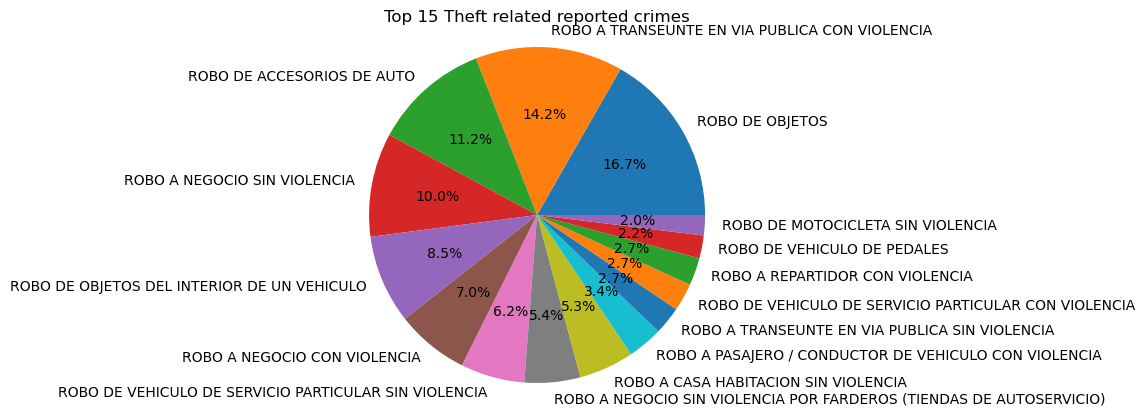

In [73]:
plt.pie(df_robos2.head(15)['count'], labels=df_robos2.head(15)['Delito'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Top 15 Theft related reported crimes')
plt.show()

# Other kinds of 'Delito'

In [57]:
df_no_robos = df_raw[~df_raw['Delito'].str.contains("ROBO")]

print("Types of crime categories in dataset without including theft: {}\n".format(df_no_robos.Delito.unique().size))

Types of crime categories in dataset without including theft: 196



In [59]:
df_no_robos2 = df_no_robos.groupby(['Delito']).size()\
                .sort_values(ascending=False)\
                .reset_index(name='count')

df_no_robos2.head(10)

,Delito,count
0,VIOLENCIA FAMILIAR,144651
1,FRAUDE,77808
2,AMENAZAS,71614
3,ABUSO DE CONFIANZA,19886
4,ABUSO SEXUAL,18213
5,NARCOMENUDEO POSESION SIMPLE,17746
6,DESPOJO,17696
7,USURPACIÓN DE IDENTIDAD,16942
8,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,14702
9,LESIONES INTENCIONALES POR GOLPES,13568


There is an overwhelming amount of crimes related to **'Violencia Familiar'**, with roughly 150k rows. This is impressive, since the 4th crime category (no related to theft) has only about 20k records. The following pie chart shows the distribution for the top 10 crime categories not related to theft.


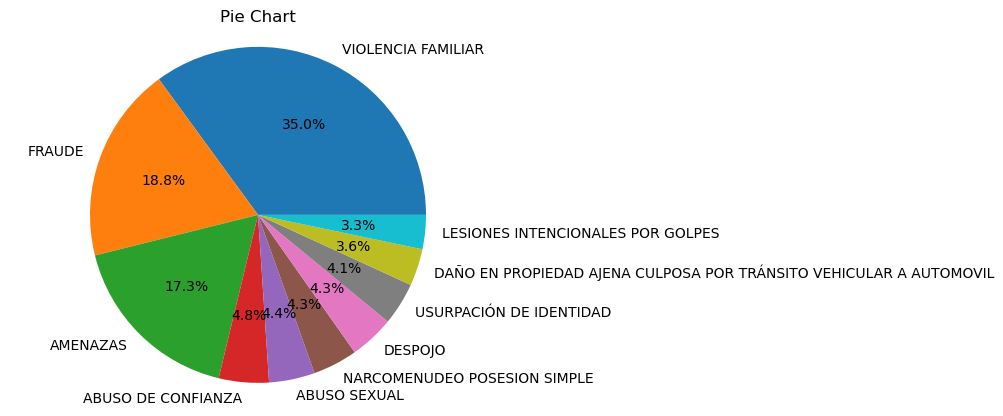

In [70]:
plt.pie(df_no_robos2.head(10)['count'], labels=df_no_robos2.head(10)['Delito'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Pie Chart')
plt.show()